# IMPORT DATASETS AND LIBRARIES

In [8]:
 !pip install tensorflow==2.0

     |████████████████████████████████| 102.7 MB 9.0 MB/s eta 0:00:01     |███████████████▏                | 48.7 MB 12.5 MB/s eta 0:00:05     |███████████████▌                | 49.9 MB 12.5 MB/s eta 0:00:05     |█████████████████████████████▋  | 95.2 MB 545 kB/s eta 0:00:14
     |████████████████████████████████| 129 kB 3.5 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 50 kB 2.9 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 3.8 MB 2.9 MB/s eta 0:00:01     |████████████████████████        | 2.9 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 3.6 MB/s eta 0:00:01
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
     |████████████████████████████████| 449 kB 9.5 MB/s eta 0:00:01
  Usi

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [11]:
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


     |████████████████████████████████| 7.0 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 3.2 MB/s eta 0:00:011


You should consider upgrading via the '/Users/keerthanamadhavan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [12]:
# Load the training dataset
instagram_df_train = pd.read_csv('insta_train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
5,1,0.00,4,0.00,0,81,1,0,344,669987,150,0
6,1,0.00,2,0.00,0,50,0,0,16,122,177,0
7,1,0.00,2,0.00,0,0,0,0,33,1078,76,0
8,1,0.00,0,0.00,0,71,0,0,72,1824,2713,0
9,1,0.00,2,0.00,0,40,1,0,213,12945,813,0


In [13]:
# Load the testing data
instagram_df_test = pd.read_csv('insta_test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
5,1,0.00,1,0.00,0,0,0,1,6,362,424,0
6,1,0.00,1,0.00,0,132,0,1,9,213,254,0
7,1,0.00,2,0.00,0,0,0,1,19,552,521,0
8,1,0.00,2,0.00,0,96,0,1,17,122,143,0
9,1,0.00,1,0.00,0,78,0,1,9,834,358,0


# PERFORM EXPLORATORY DATA ANALYSIS

In [14]:
# Getting dataframe info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
profile pic             576 non-null int64
nums/length username    576 non-null float64
fullname words          576 non-null int64
nums/length fullname    576 non-null float64
name==username          576 non-null int64
description length      576 non-null int64
external URL            576 non-null int64
private                 576 non-null int64
#posts                  576 non-null int64
#followers              576 non-null int64
#follows                576 non-null int64
fake                    576 non-null int64
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [15]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [16]:
# Checking if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [17]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [18]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

# PERFORM DATA VISUALIZATION

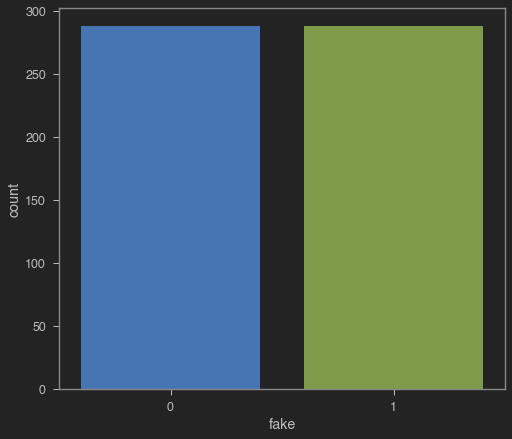

In [19]:
# Visualize the data
sns.countplot(instagram_df_train['fake'])

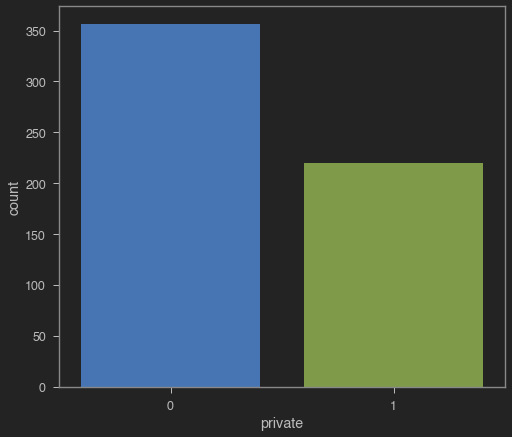

In [20]:
# Visualize the private column data
sns.countplot(instagram_df_train['private'])

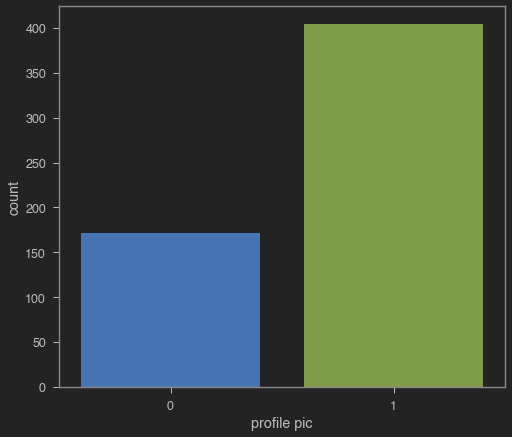

In [21]:
# Visualize the "profile pic" column data
sns.countplot(instagram_df_train['profile pic'])

/Users/keerthanamadhavan/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


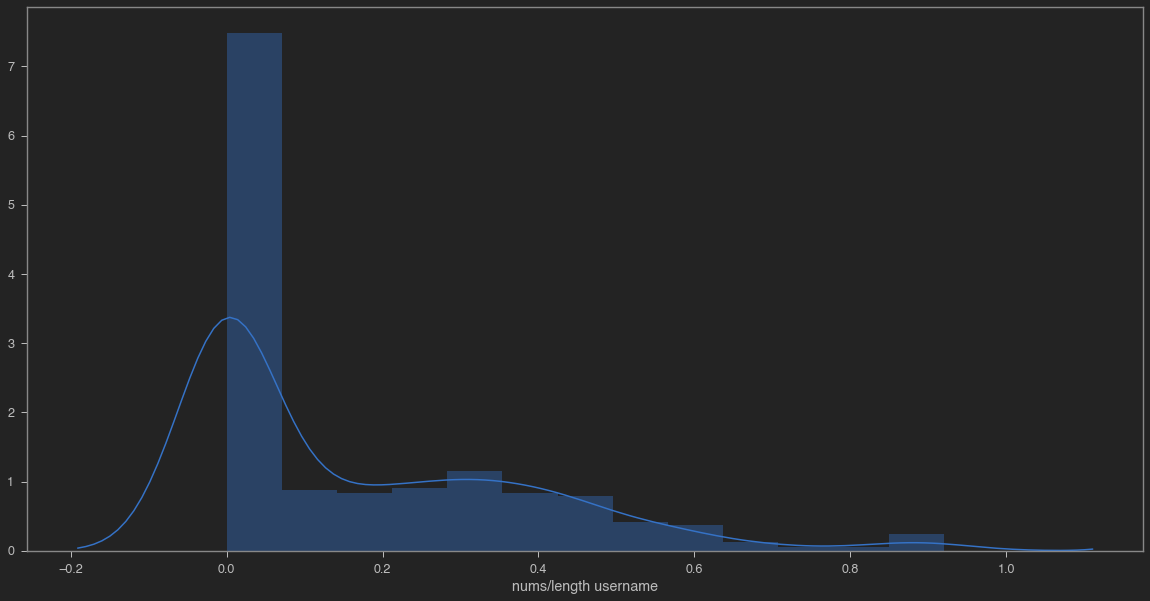

In [22]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'])

<Figure size 1440x1440 with 0 Axes>

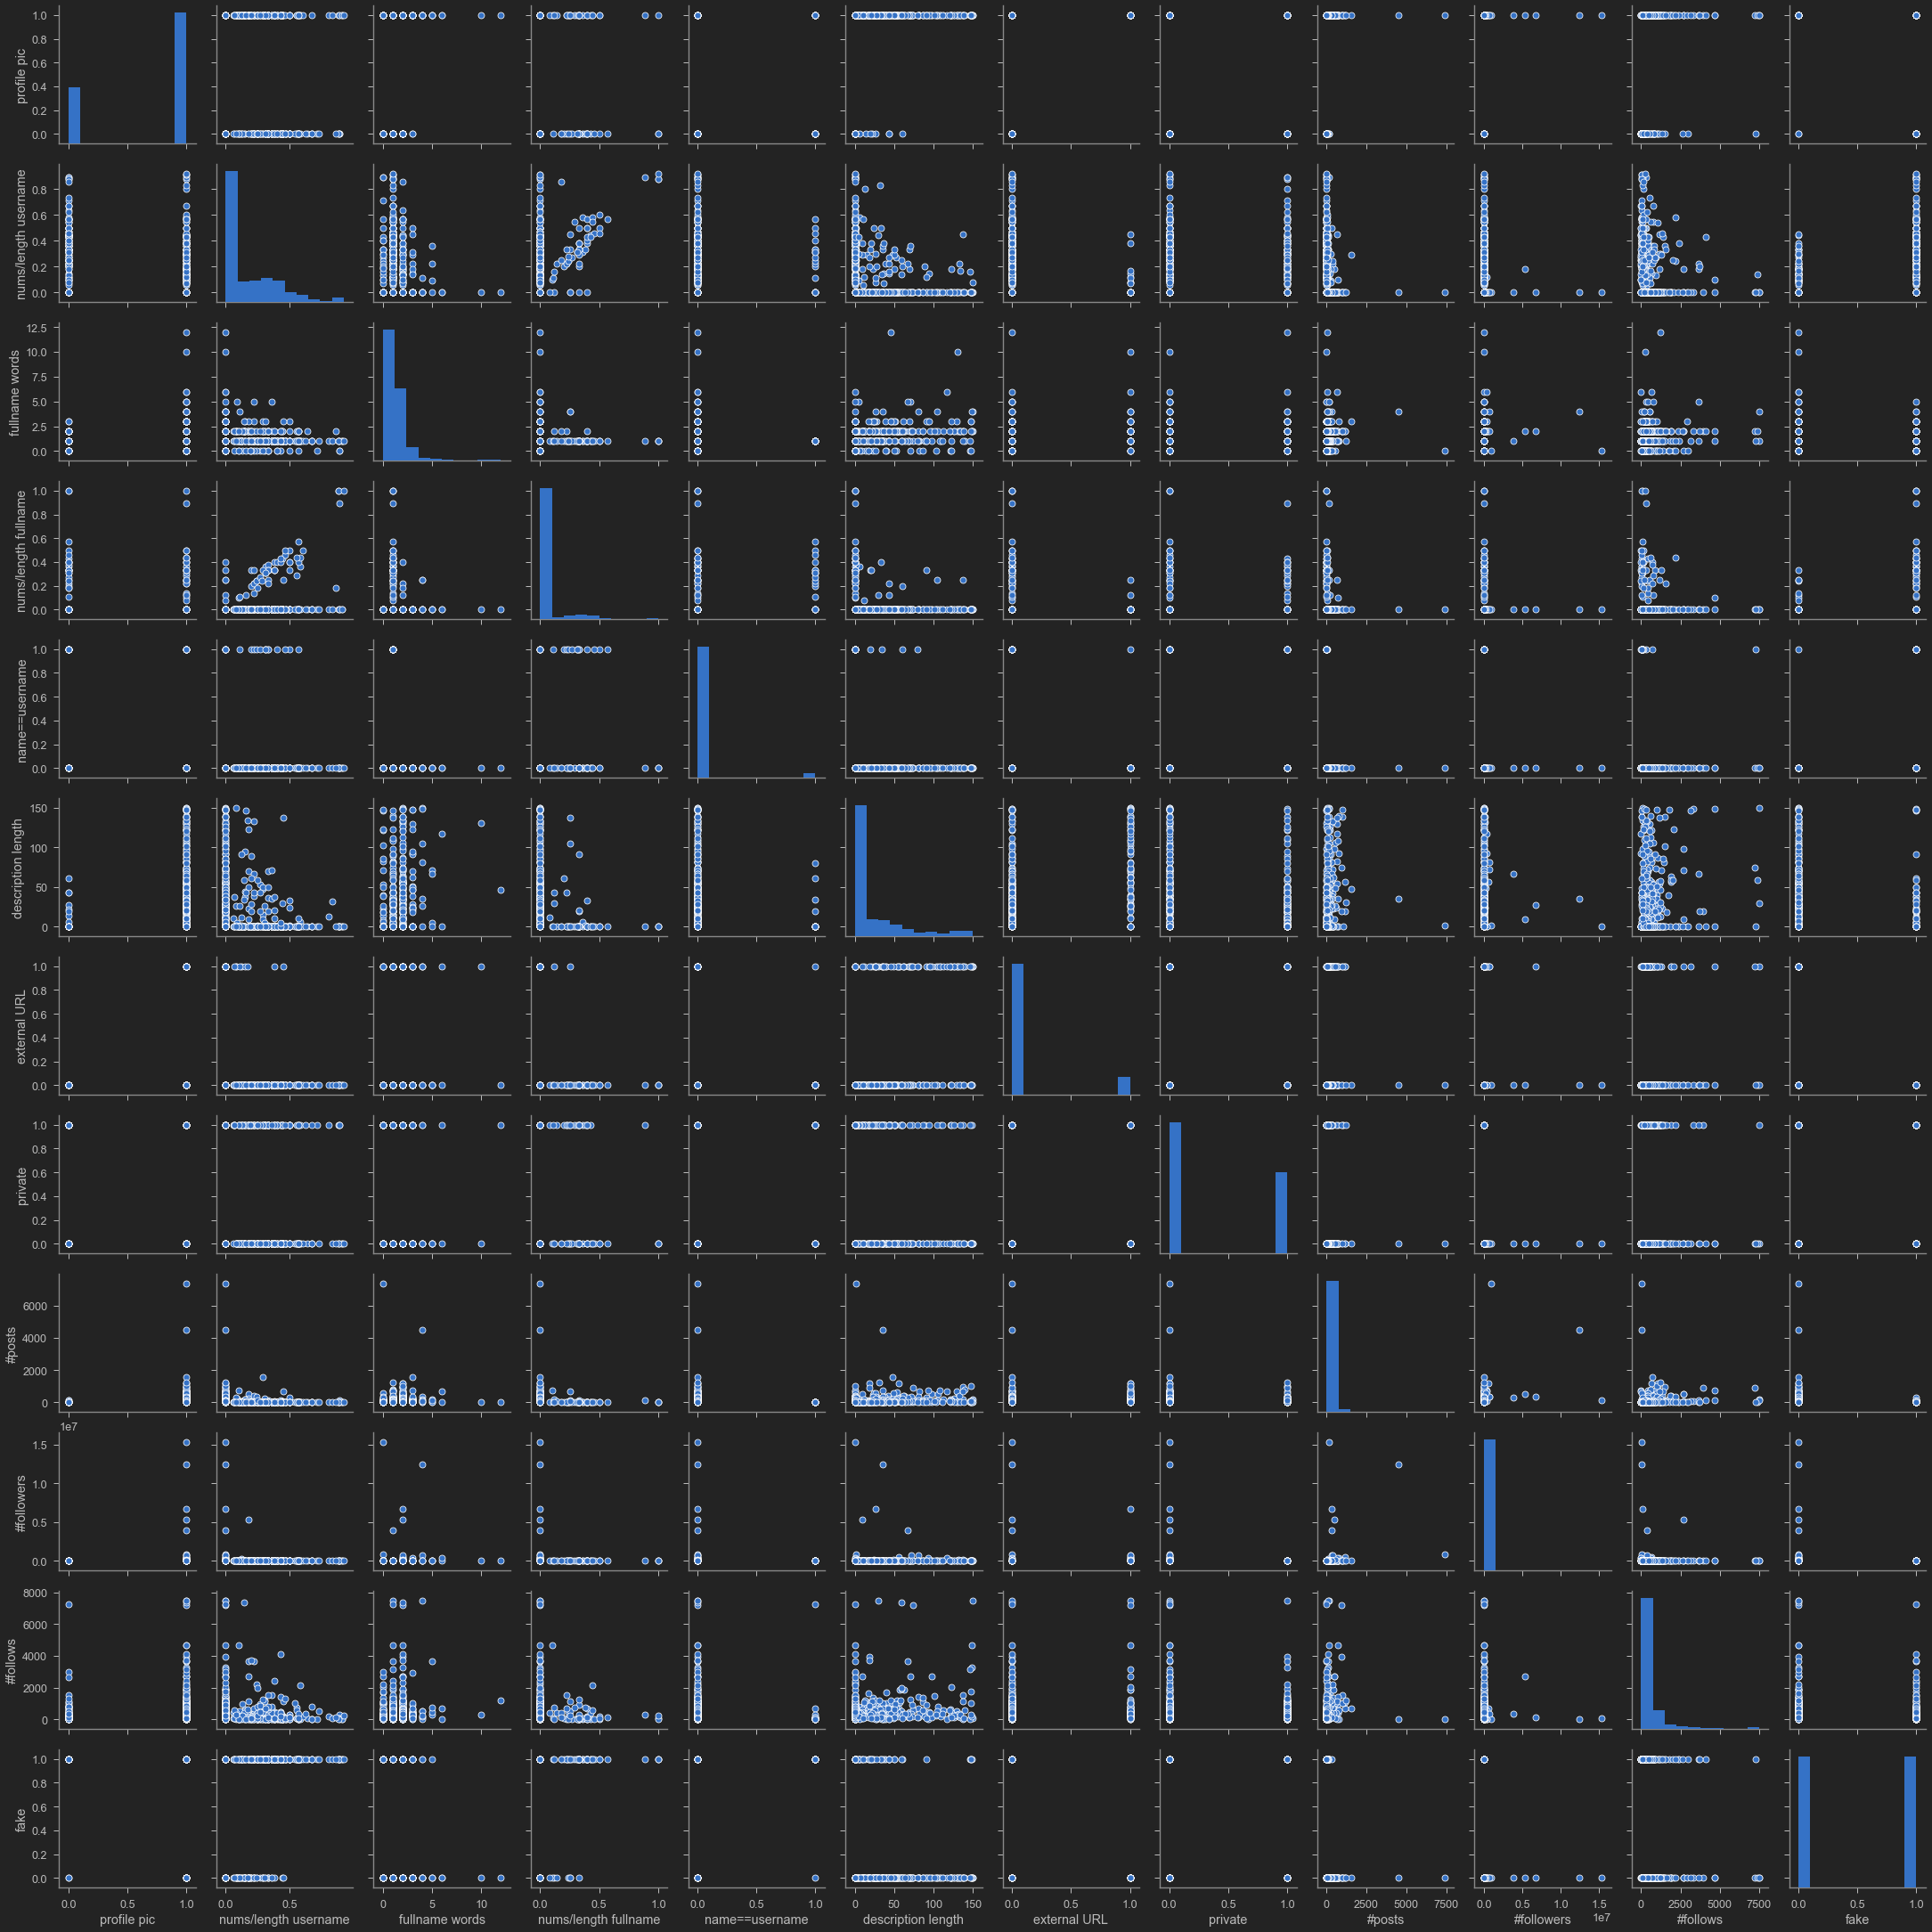

In [15]:
# Plot pairplot
plt.figure(figsize = (20, 20))
sns.pair

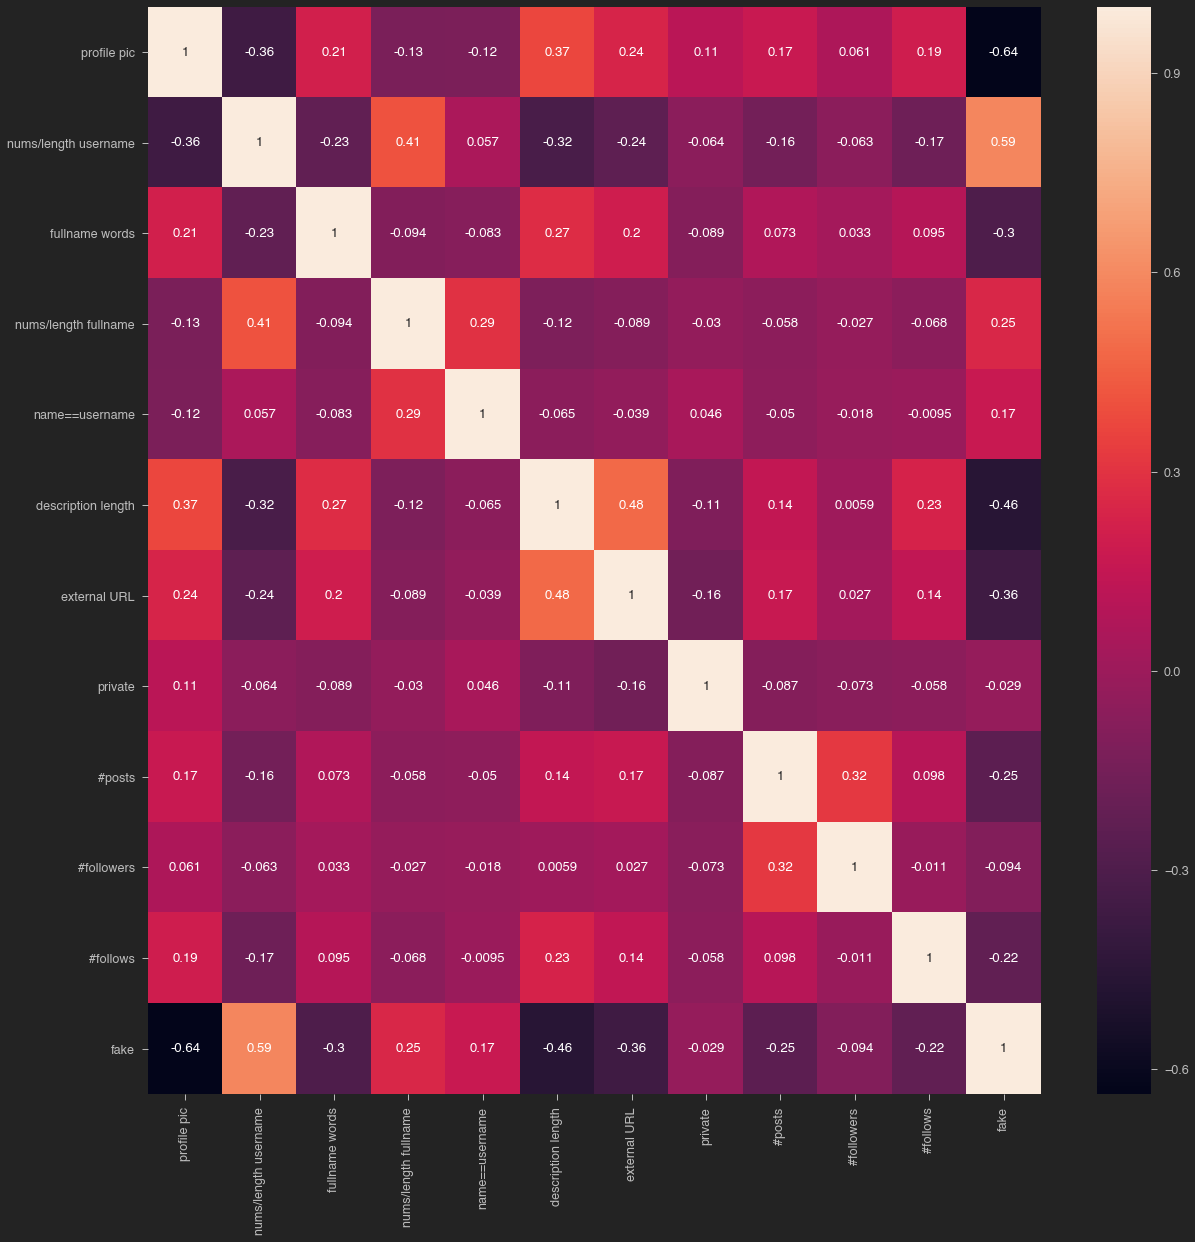

In [26]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

# PREPARE THE DATA TO FEED THE MODEL

In [27]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
5,1,0.00,4,0.00,0,81,1,0,344,669987,150
6,1,0.00,2,0.00,0,50,0,0,16,122,177
7,1,0.00,2,0.00,0,0,0,0,33,1078,76
8,1,0.00,0,0.00,0,71,0,0,72,1824,2713
9,1,0.00,2,0.00,0,40,1,0,213,12945,813


In [28]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
5,1,0.00,1,0.00,0,0,0,1,6,362,424
6,1,0.00,1,0.00,0,132,0,1,9,213,254
7,1,0.00,2,0.00,0,0,0,1,19,552,521
8,1,0.00,2,0.00,0,96,0,1,17,122,143
9,1,0.00,1,0.00,0,78,0,1,9,834,358


In [29]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [30]:
y_train

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    1
563    1
564    1
565    1
566    1
567    1
568    1
569    1
570    1
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [31]:
y_test

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
111    1
112    1
113    1
114    1
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [32]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

/Users/keerthanamadhavan/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/keerthanamadhavan/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/keerthanamadhavan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [33]:

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [34]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [35]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

# BUILD AND TRAIN A SIMPLE DEEP LEARNING MODEL

In [37]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 150)               7650      
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 25)                3775      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 52        
Total params: 12,077
Trainable params: 12,077
Non-trainable params: 0
__________________________________________________

In [38]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
epochs_hist = model.fit(X_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Train on 518 samples, validate on 58 samples
Epoch 1/20
518/518 [==============================] - 1s 1ms/sample - loss: 0.5411 - accuracy: 0.7471 - val_loss: 0.4301 - val_accuracy: 0.8966
Epoch 2/20
518/518 [==============================] - 0s 113us/sample - loss: 0.3867 - accuracy: 0.8764 - val_loss: 0.2415 - val_accuracy: 0.9483
Epoch 3/20
518/518 [==============================] - 0s 113us/sample - loss: 0.3132 - accuracy: 0.8938 - val_loss: 0.2147 - val_accuracy: 0.9483
Epoch 4/20
518/518 [==============================] - 0s 120us/sample - loss: 0.2836 - accuracy: 0.8996 - val_loss: 0.1715 - val_accuracy: 0.9483
Epoch 5/20
518/518 [==============================] - 0s 124us/sample - loss: 0.2674 - accuracy: 0.9015 - val_loss: 0.1404 - val_accuracy: 0.9483
Epoch 6/20
518/518 [==============================] - 0s 116us/sample - loss: 0.2335 - accuracy: 0.9131 - val_loss: 0.1310 - val_accuracy: 0.9483
Epoch 7/20
518/518 [==============================] - 0s 129us/sample - loss: 0.2

# ASSESSING THE PERORMANCE OF TRAINED MODEL

In [40]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


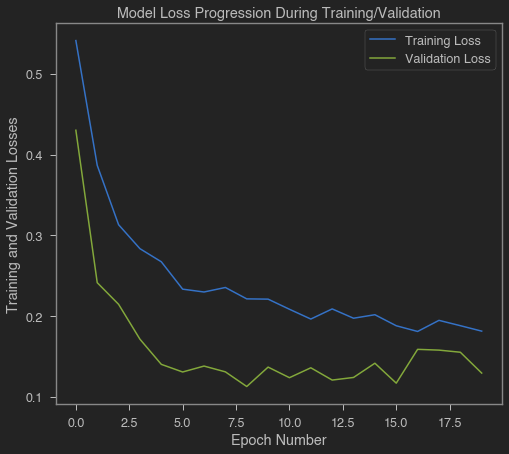

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [42]:
predicted = model.predict(X_test)

In [43]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [44]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.88      0.87      0.87        60

   micro avg       0.88      0.88      0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



Text(0.5, 61.0, 'predicted class')

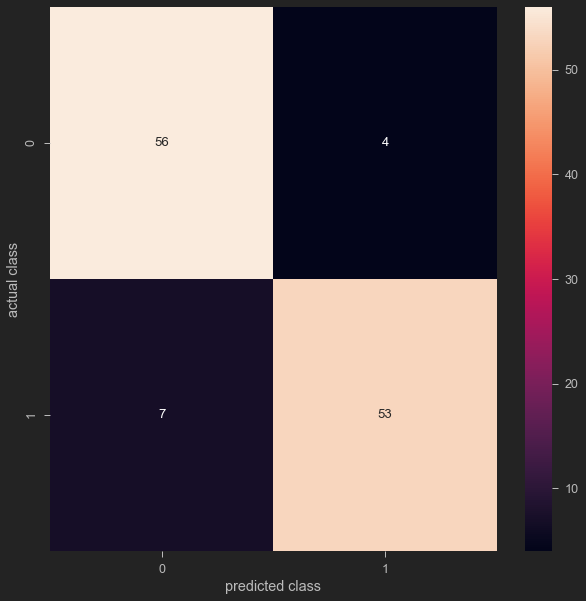

In [41]:
plt.figure(figsize=(10, 10))
